             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Кількість рядків: 28
Кількість стовпців: 9

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0 

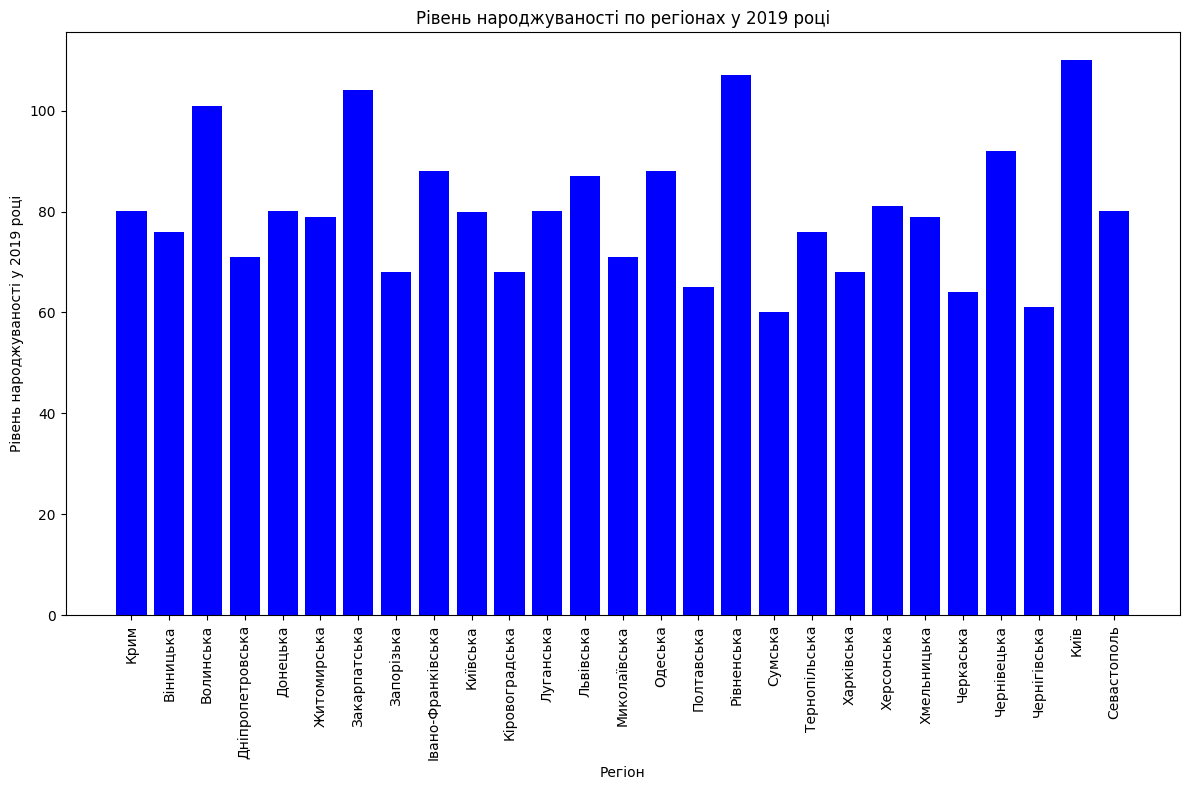

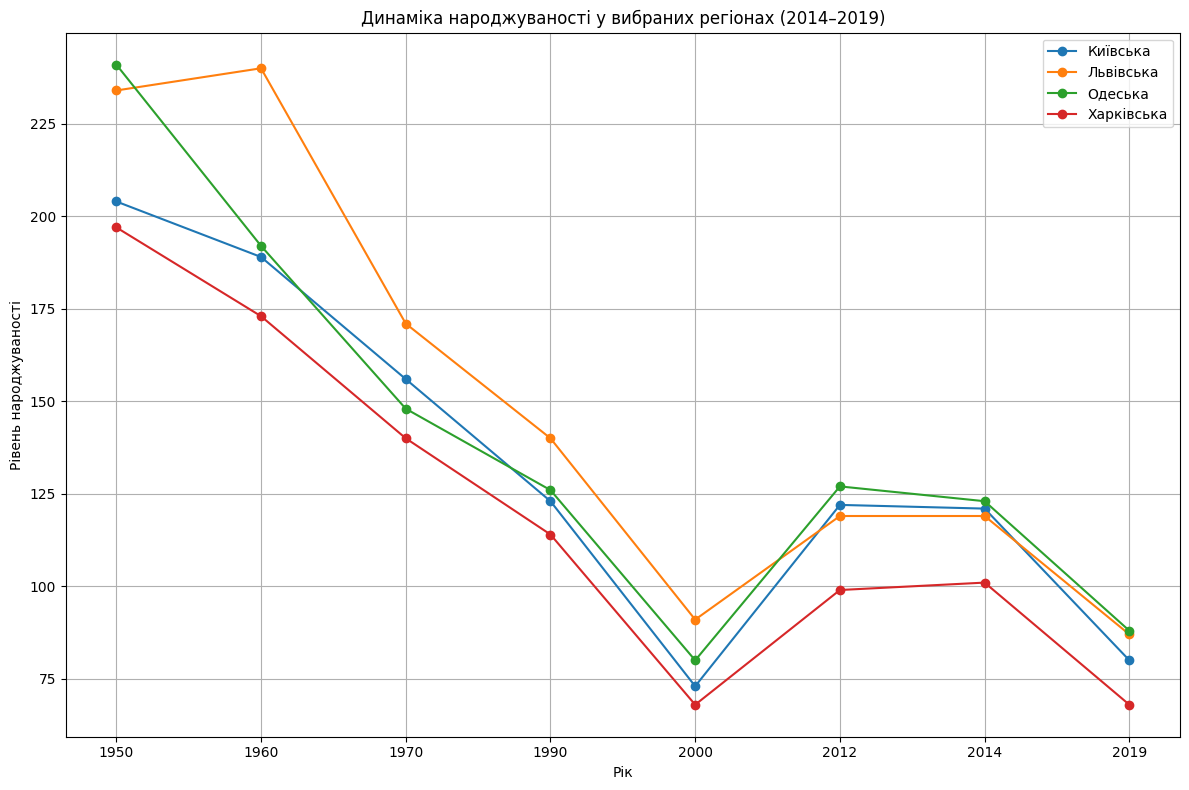

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url)
# print(f'Знайдено {len(tables)} таблиць.')
# for i, table in enumerate(tables):
#     print(f'Таблиця №{i}:\n')
#     print(table.head())

table = tables[13]
print(table.head())
print('\n')

df = pd.DataFrame(table)
rows, columns = df.shape
print(f'Кількість рядків: {rows}')
print(f'Кількість стовпців: {columns}' + '\n')

df.replace('—', np.nan, inplace=True)
print(df)
print('\n')

print(df.dtypes)
print('\n')

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)
print('\n')

print('///////////////////////////////////')
num_missing = df.isnull().sum()
total_rows = len(df)
missing_fraction = num_missing / total_rows
print(missing_fraction)
print('\n')

df = df.iloc[:-1]
print(df)
print('\n')


cols_to_fill = df.columns[1:]
mean_values = df[cols_to_fill].mean()
df[cols_to_fill] = df[cols_to_fill].fillna(mean_values)
print(df)
print('\n')


print(df.columns.tolist())


average_birth_rate_2019 = df['2019'].mean()
print(f"Середній рівень народжуваності у 2019 році: {average_birth_rate_2019}")
regions = df[df['2019'] > average_birth_rate_2019]['Регіон'].tolist()
print("Список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
print(regions)
print('\n')

max_birth_rate_2014 = df['2014'].max()
region = df[df['2014'] == max_birth_rate_2014]['Регіон'].iloc[0]
print(f"{region} область")
print('\n')


df_cleaned = df.dropna(subset=['2019'])
plt.figure(figsize=(12, 8))
plt.bar(df_cleaned['Регіон'], df_cleaned['2019'], color='blue')
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Рівень народжуваності по регіонах у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

selected_regions = ['Київська', 'Львівська', 'Одеська', 'Харківська']
df_selected = df[df['Регіон'].isin(selected_regions)]

plt.figure(figsize=(12, 8))
for _, row in df_selected.iterrows():
    years = df.columns[1:].astype(str)
    birth_rates = row[1:]
    plt.plot(years, birth_rates, marker='o', label=row['Регіон'])

plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.title('Динаміка народжуваності у вибраних регіонах (2014–2019)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
